In [1]:
from torchtext import data
import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

import torch




In [31]:

# this needs to be cleaned up and data can be grouped in a more efficient way 

path= '/Users/tancredicp/Desktop/sailing_app/data/MLModified/'
all_files = glob.glob(path + "/*.csv")

TAGS = data.Field(unk_token = None)
TAGS.build_vocab(['0','S', 'C','G','T','B','D', 'A'])

DataLatLon = []
Data = []
for filename in all_files:
    temporary_dict = {}

    dfSpecific = pd.read_csv(filename, index_col=0, header=0)
    dfSpecific.fillna(0, inplace= True)
    
    dfSpecificY = dfSpecific['tag']
    Yarray = TAGS.numericalize((np.array(dfSpecificY)))
    
#     #change to fixed number
#     ynval =  9 #np.max(np.array(Yarray)) + 1
#     Yarray = np.eye(ynval)[Yarray[0]]
#     Yarray = torch.tensor(Yarray).unsqueeze(0)
    
    
    
    temporary_dict['tags'] = Yarray.long()
    

    dfSpecificX = dfSpecific.drop(columns=['tag', 'lat', 'lon'])
    
    dfMetaData = dfSpecific[['tag', 'lat', 'lon']]
    DataLatLon.append(dfMetaData)
    
#     scaler = StandardScaler()
#     dfSpecificX = scaler.fit_transform(dfSpecificX)
    
    array1 = np.array(dfSpecificX)
    
    temp = torch.from_numpy(array1)
    
    temporary_dict['track'] = temp.unsqueeze(0)
    
    Data.append(temporary_dict)
    del(temporary_dict)


In [67]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.lstm1 = nn.GRU(batch_first= True, input_size =5, hidden_size = 8, bidirectional= True, dropout = 0.9)
        self.fcn1 = nn.Linear(16, 9)
#         self.fcn2 = nn.Linear(512, 512)
#         self.fcn3 = nn.Linear(512, 9)
        
#         self.softmax = nn.Softmax(dim=2)

    def forward(self, x):

        x, _ = self.lstm1(x)


        x = F.relu(self.fcn1(x))
#         x = F.dropout(x, p = 0.5)
#         x = F.relu(self.fcn2(x))
#         x = F.dropout(x, p = 0.5)
#         x = F.relu(self.fcn3(x))
#         x = F.dropout(x, p = 0.9)
#         x =x.squeeze(1)
  
        
#         x = self.softmax(x)
        
        return x


In [71]:
import torch.optim as optim

net = Net()
criterion = nn.CrossEntropyLoss(ignore_index= 0)
optimizer = optim.Adam(net.parameters(), lr=0.001)


In [98]:
for epoch in range(10000):
    
    optimizer.zero_grad()
    
    running_loss = 0.0
    
    for i in Data:
#         print('a')
        X = i['track'].float()
        y = i['tags']
        
#         o2 = y.argmax(2).flatten()
#         print(Counter(np.array(o2)))
        
        outputs = net(X)
        outputs = outputs.permute(0, 2, 1) #.long()
        
#         print(outputs.shape, y.shape)
        
#         print(y.type(), outputs.type())
        loss = criterion(outputs, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        

    
    
    if epoch % 1== 0: 
        
        ##THIS IS WRONG - the score will only be for last race 
        
        o1 = (outputs.detach().argmax(1).flatten())
        o2 = y[0] #y.argmax(2).flatten()
        acc = accuracy_score(o1, o2)
        print("Epoch: ", epoch, "Loss: ", running_loss, "Accuracy:", acc) 

Epoch:  0 Loss:  16.719352900981903 Accuracy: 0.7883435582822086
Epoch:  1 Loss:  17.0216523706913 Accuracy: 0.8724802804557406
Epoch:  2 Loss:  17.696928769350052 Accuracy: 0.8680981595092024
Epoch:  3 Loss:  16.69515359401703 Accuracy: 0.845749342681858
Epoch:  4 Loss:  15.945206671953201 Accuracy: 0.8404907975460123
Epoch:  5 Loss:  15.668381303548813 Accuracy: 0.8650306748466258
Epoch:  6 Loss:  15.411127418279648 Accuracy: 0.8470639789658194
Epoch:  7 Loss:  15.104114592075348 Accuracy: 0.8409290096406661
Epoch:  8 Loss:  14.954614132642746 Accuracy: 0.8483786152497809
Epoch:  9 Loss:  14.746136635541916 Accuracy: 0.8413672217353199
Epoch:  10 Loss:  14.766795367002487 Accuracy: 0.8431200701139352
Epoch:  11 Loss:  14.773576527833939 Accuracy: 0.8615249780893953
Epoch:  12 Loss:  14.849085986614227 Accuracy: 0.8580192813321648
Epoch:  13 Loss:  14.819633513689041 Accuracy: 0.8729184925503944
Epoch:  14 Loss:  15.003368377685547 Accuracy: 0.8724802804557406
Epoch:  15 Loss:  15.473

Epoch:  125 Loss:  10.217342779040337 Accuracy: 0.8637160385626643
Epoch:  126 Loss:  10.453101769089699 Accuracy: 0.8746713409290097
Epoch:  127 Loss:  10.467632547020912 Accuracy: 0.8659070990359334
Epoch:  128 Loss:  10.966081872582436 Accuracy: 0.8702892199824716
Epoch:  129 Loss:  10.087312668561935 Accuracy: 0.8702892199824716
Epoch:  130 Loss:  10.050517365336418 Accuracy: 0.864592462751972
Epoch:  131 Loss:  9.801681637763977 Accuracy: 0.8724802804557406
Epoch:  132 Loss:  9.718876272439957 Accuracy: 0.871603856266433
Epoch:  133 Loss:  9.626118198037148 Accuracy: 0.8694127957931639
Epoch:  134 Loss:  9.543613657355309 Accuracy: 0.873794916739702
Epoch:  135 Loss:  9.515661343932152 Accuracy: 0.8680981595092024
Epoch:  136 Loss:  9.4928680062294 Accuracy: 0.8694127957931639
Epoch:  137 Loss:  9.505974248051643 Accuracy: 0.8711656441717791
Epoch:  138 Loss:  10.050533413887024 Accuracy: 0.8663453111305872
Epoch:  139 Loss:  10.59609068930149 Accuracy: 0.8733567046450482
Epoch:  

Epoch:  250 Loss:  8.180011242628098 Accuracy: 0.8794916739702016
Epoch:  251 Loss:  8.157698720693588 Accuracy: 0.8799298860648553
Epoch:  252 Loss:  8.110722243785858 Accuracy: 0.880806310254163
Epoch:  253 Loss:  8.081912875175476 Accuracy: 0.8803680981595092
Epoch:  254 Loss:  8.047383964061737 Accuracy: 0.8799298860648553
Epoch:  255 Loss:  8.021351248025894 Accuracy: 0.8790534618755478
Epoch:  256 Loss:  7.984439209103584 Accuracy: 0.8803680981595092
Epoch:  257 Loss:  7.97393424808979 Accuracy: 0.8790534618755478
Epoch:  258 Loss:  7.952078238129616 Accuracy: 0.8799298860648553
Epoch:  259 Loss:  7.969782188534737 Accuracy: 0.8803680981595092
Epoch:  260 Loss:  8.199666380882263 Accuracy: 0.878615249780894
Epoch:  261 Loss:  8.806303977966309 Accuracy: 0.8860648553900088
Epoch:  262 Loss:  9.039198398590088 Accuracy: 0.8781770376862401
Epoch:  263 Loss:  10.788041710853577 Accuracy: 0.8838737949167397
Epoch:  264 Loss:  10.313065379858017 Accuracy: 0.8650306748466258
Epoch:  265

KeyboardInterrupt: 

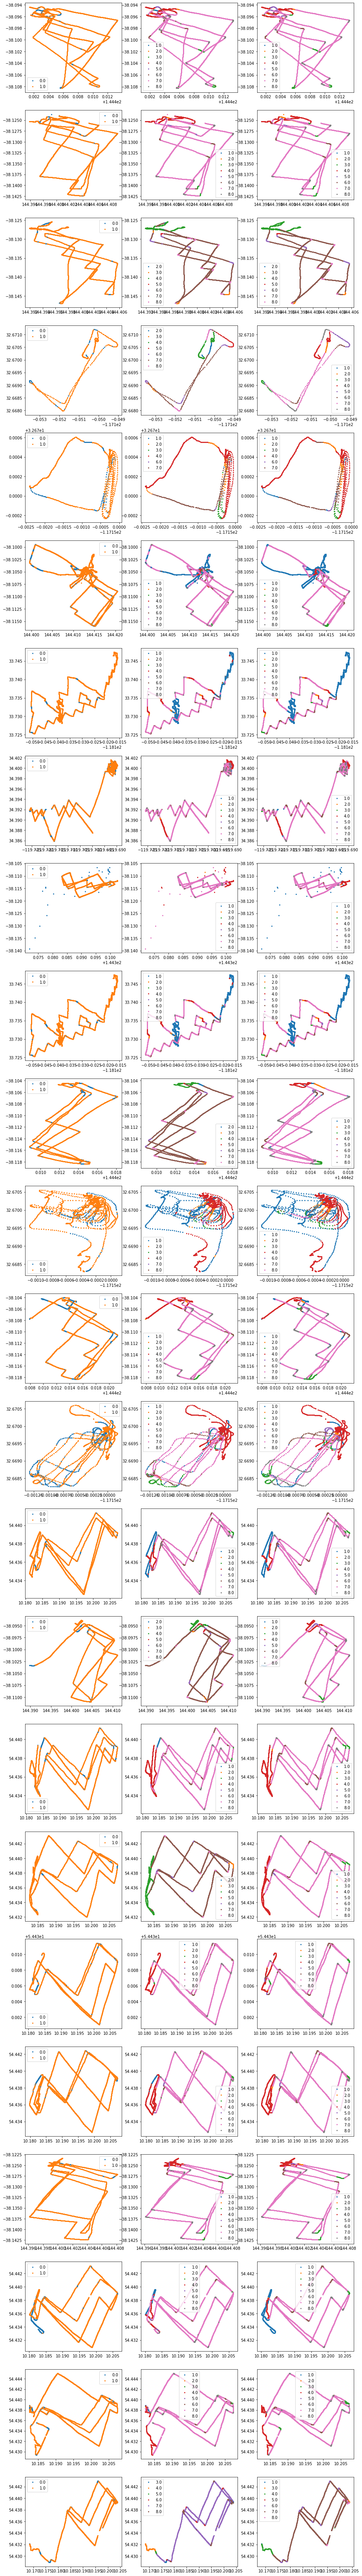

In [99]:
fig, axes = plt.subplots(24, 3, figsize = (15,120))
for i, ax, meta  in zip(Data, axes, DataLatLon):
    X = i['track'].float()
    y = i['tags'].float()
    outputs = net(X)
    
    
    o1 = (outputs.detach().argmax(2).flatten())
    o2 = y[0]
    acc = accuracy_score(o1, o2)
    
#     print("accuracy",  acc)
     
    lon = meta['lon'] #i['track'][0][:, 0]
    lat = meta['lat'] #i['track'][0][:, 1]
    cols = np.array(o1 == o2).astype(int)
    
    
    for name , man in pd.DataFrame([np.array(lon), np.array(lat), np.array(cols)]).T.groupby(2):
        ax[0].plot(man[0], man[1], marker='o', linestyle='', ms=2, label=name)
        ax[0].legend()
        
    for name , man in pd.DataFrame([np.array(lon), np.array(lat), np.array(o1)]).T.groupby(2):
        ax[1].plot(man[0], man[1], marker='o', linestyle='', ms=2, label=name)
        ax[1].legend()
    
    
    for name , man in pd.DataFrame([np.array(lon), np.array(lat), np.array(o2)]).T.groupby(2):
        ax[2].plot(man[0], man[1], marker='o', linestyle='', ms=2, label=name)
        ax[2].legend()
        
        
    
#     ax.scatter(np.array(lon), np.array(lat), s = 1)
#     ax.scatter(np.array(lon), np.array(lat), c = cols, s = 1)
#     ax.set_title("Accuracy: " + str(acc))


In [164]:
#colors part of track labeled incorrectly when
#takes DF with lon and lat columns, preds series, true series
def quick_check(track, preds, trues):
    fig, axes = plt.subplots()
    matches = trues.eq(preds)
    track['matches'] = matches

    groups = track.groupby('matches')
    print('Percent Correct: ' + str(100*len(groups.get_group(True))/len(track)))
    for name, group in groups:
        axes.plot(group.lat, group.lon,marker='o', linestyle='', ms=2, label=name)
    axes.set_title(f"{track['place'].any()}, {track['track_id'].any()}")
    axes.legend()